In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
df = pd.read_csv("../data/student_preprocessed.csv")

# Define features (X) and target (y)
X = df.drop("G3", axis=1)
y = df["G3"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split complete:")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Data split complete:
Train shape: (316, 38)
Test shape: (79, 38)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Create and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model trained successfully!")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


✅ Model trained successfully!
Mean Absolute Error: 1.17
R² Score: 0.82


In [12]:
import joblib
import os

# Create results folder if it doesn't exist
os.makedirs("results", exist_ok=True)

# Save model inside the results folder (relative path)
joblib.dump(model, "../results/student_performance_model.pkl")
print("✅ Model saved successfully in 'results/' folder!")


✅ Model saved successfully in 'results/' folder!


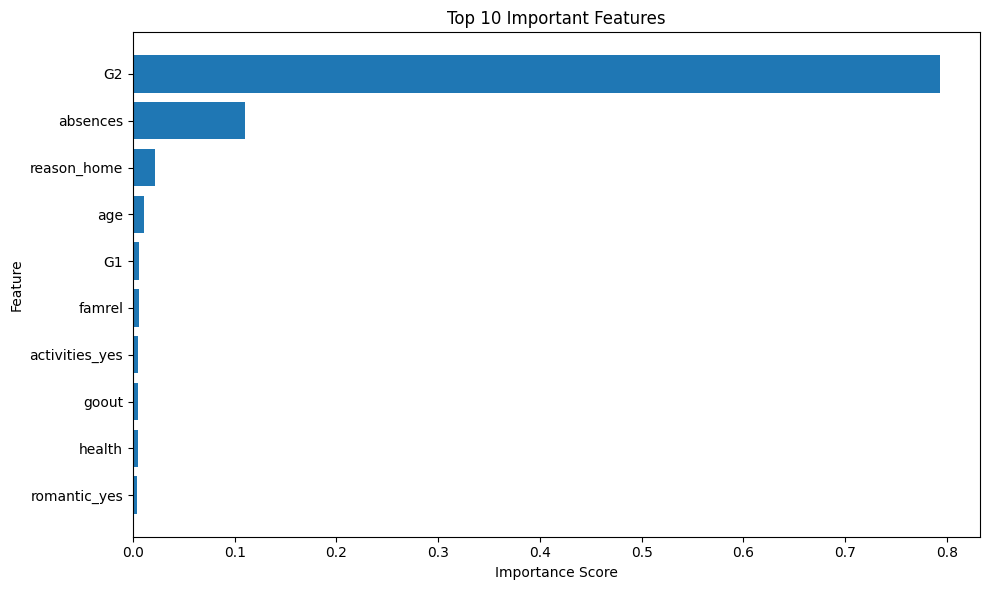

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(range(10), importances[indices][:10][::-1])
plt.yticks(range(10), [features[i] for i in indices[:10]][::-1])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()


Linear Regression: R² = 0.721, RMSE = 2.390
Random Forest: R² = 0.818, RMSE = 1.934
Gradient Boosting: R² = 0.814, RMSE = 1.954
SVR: R² = 0.793, RMSE = 2.062

Model Comparison:
                          R2      RMSE
Linear Regression  0.721333  2.390413
Random Forest      0.817682  1.933505
Gradient Boosting  0.813839  1.953774
SVR                0.792549  2.062471


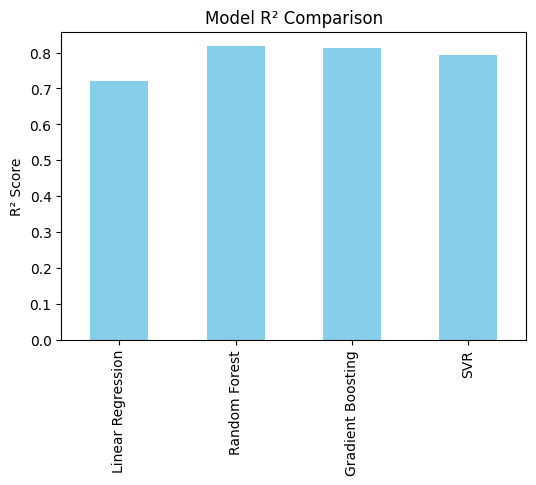

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2": r2, "RMSE": rmse}
    print(f"{name}: R² = {r2:.3f}, RMSE = {rmse:.3f}")

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)

# Plot comparison
results_df["R2"].plot(kind="bar", color="skyblue", title="Model R² Comparison", figsize=(6,4))
plt.ylabel("R² Score")
plt.show()
